In [1]:
import pandas as pd
import numpy as np
import pickle
import json
import pathlib

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 3]
plt.rcParams['figure.dpi'] = 400
plt.rcParams['figure.autolayout'] = True

font = {'size'   : 22}

matplotlib.rc('font', **font)
matplotlib.use("pgf")

import os
import sys
os.chdir('..')
sys.path.insert(0, '..')

from trlfpi.report import Report

In [2]:
def importExperimentData(experimentNames):
    experiments = []
    rewards = []
    eval_rewards = []
    test_rewards = []
    actor_loss = []
    critic_loss = []
    for path, name in experimentNames:
        
        report = Report(f"./results/{path}")
        for i in report.listExisting():
            report.id(i)
            variables = report.unpickle('variables')
            rewards.append(variables['reward'][0])
            eval_rewards.append(variables['eval_reward'])
            actor_loss.append(variables['actor_loss'][0])
            if 'critic_loss' in variables:
                critic_loss.append(variables['critic_loss'][0])
            elif 'c1_loss' in variables:
                critic_loss.append(variables['c1_loss'][0])
            test_rewards.append(variables['test_reward'][0])
            experiments.append({
                'name': name,
                'iteration': i
            })
    i = pd.Index(range(1, 5001))
    nI = pd.Index(range(30))
    evalRewardsDF = pd.concat([pd.DataFrame({idx: x[0]}, index=x[1]).reindex(i).T for idx, x in enumerate(eval_rewards)], axis=0)
    
    dfs = list(map(lambda x: pd.DataFrame(x), [experiments, rewards, test_rewards, actor_loss, critic_loss]))
    dfs.append(evalRewardsDF)
    return dfs

# PPO with Future Inputs

In [3]:
expDF, rewardDF, testRewardDF, actorDF, criticDF, evalRewardDF = importExperimentData([
      ('0_PPO_s_h3', 'PPO'),
      ('0_DPPO_s_h3', 'DPPO'),
      ('0_MAPPO_s_h3', 'MAPPO')
])

rDF = pd.concat([expDF, rewardDF], axis=1, join='inner').drop(['iteration'], axis=1)
erDF = pd.concat([expDF, evalRewardDF], axis=1, join='inner').drop(['iteration'], axis=1)
cDF = pd.concat([expDF, criticDF], axis=1, join='inner').drop(['iteration'], axis=1)
expDF['bestEvalEp'] = erDF.drop('name', axis=1).T.idxmax()
compTableDF = expDF.groupby('name').mean().drop(['iteration'], axis=1)
compTableDF['rewardMean'] =  pd.concat([expDF, testRewardDF], axis=1, join='inner').groupby('name').mean().drop(['iteration', 'bestEvalEp'], axis=1).mean(axis=1)
compTableDF['rewardStd'] = pd.concat([expDF, testRewardDF], axis=1, join='inner').groupby('name').mean().drop(['iteration', 'bestEvalEp'], axis=1).std(axis=1)
compTableDF['bestEvalEpStd'] = expDF.groupby('name').std().drop(['iteration'], axis=1)
compTableDF

,bestEvalEp,rewardMean,rewardStd,bestEvalEpStd
name,,,,
DPPO,1080,-1.283210,0.316108,982.725801
MAPPO,760,-0.821552,0.203735,983.234458
PPO,1250,-4.716175,0.923623,586.301970


In [4]:
expDF, rewardDF, testRewardDF, actorDF, criticDF, evalRewardDF = importExperimentData([
      ('1_PPO_s_h3', 'PPO'),
      ('1_DPPO_s_h3', 'DPPO'),
      ('1_MAPPO_s_h3', 'MAPPO')
])

rDF = pd.concat([expDF, rewardDF], axis=1, join='inner').drop(['iteration'], axis=1)
erDF = pd.concat([expDF, evalRewardDF], axis=1, join='inner').drop(['iteration'], axis=1)
cDF = pd.concat([expDF, criticDF], axis=1, join='inner').drop(['iteration'], axis=1)
expDF['bestEvalEp'] = erDF.drop('name', axis=1).T.idxmax()
compTableDF = expDF.groupby('name').mean().drop(['iteration'], axis=1)
compTableDF['rewardMean'] =  pd.concat([expDF, testRewardDF], axis=1, join='inner').groupby('name').mean().drop(['iteration', 'bestEvalEp'], axis=1).mean(axis=1)
compTableDF['rewardStd'] = pd.concat([expDF, testRewardDF], axis=1, join='inner').groupby('name').mean().drop(['iteration', 'bestEvalEp'], axis=1).std(axis=1)
compTableDF['bestEvalEpStd'] = expDF.groupby('name').std().drop(['iteration'], axis=1)
compTableDF

,bestEvalEp,rewardMean,rewardStd,bestEvalEpStd
name,,,,
DPPO,1928,-0.986345,0.374888,1485.048821
MAPPO,3172,-1.059630,0.524247,1566.866299
PPO,708,-2.883176,0.493843,864.216408


In [5]:
expDF, rewardDF, testRewardDF, actorDF, criticDF, evalRewardDF = importExperimentData([
      ('2_PPO_b_h3', 'PPO'),
      ('2_DPPO_b_h3', 'DPPO'),
      ('2_MAPPO_b_h3', 'MAPPO')
])

rDF = pd.concat([expDF, rewardDF], axis=1, join='inner').drop(['iteration'], axis=1)
erDF = pd.concat([expDF, evalRewardDF], axis=1, join='inner').drop(['iteration'], axis=1)
cDF = pd.concat([expDF, criticDF], axis=1, join='inner').drop(['iteration'], axis=1)
expDF['bestEvalEp'] = erDF.drop('name', axis=1).T.idxmax()
compTableDF = expDF.groupby('name').mean().drop(['iteration'], axis=1)
compTableDF['rewardMean'] =  pd.concat([expDF, testRewardDF], axis=1, join='inner').groupby('name').mean().drop(['iteration', 'bestEvalEp'], axis=1).mean(axis=1)
compTableDF['rewardStd'] = pd.concat([expDF, testRewardDF], axis=1, join='inner').groupby('name').mean().drop(['iteration', 'bestEvalEp'], axis=1).std(axis=1)
compTableDF['bestEvalEpStd'] = expDF.groupby('name').std().drop(['iteration'], axis=1)
compTableDF

,bestEvalEp,rewardMean,rewardStd,bestEvalEpStd
name,,,,
DPPO,2760.0,-0.514618,0.271050,902.921185
MAPPO,360.0,-0.310264,0.123087,139.821315
PPO,2198.0,-2.124690,0.698843,1523.210425


In [6]:
expDF, rewardDF, testRewardDF, actorDF, criticDF, evalRewardDF = importExperimentData([
      ('3_TPPO_b_h3', 'TPPO'),
      ('3_TDPPO_b_h3', 'TDPPO'),
      ('3_TMAPPO_b_h3', 'TMAPPO')
])

rDF = pd.concat([expDF, rewardDF], axis=1, join='inner').drop(['iteration'], axis=1)
erDF = pd.concat([expDF, evalRewardDF], axis=1, join='inner').drop(['iteration'], axis=1)
cDF = pd.concat([expDF, criticDF], axis=1, join='inner').drop(['iteration'], axis=1)
expDF['bestEvalEp'] = erDF.drop('name', axis=1).T.idxmax()
compTableDF = expDF.groupby('name').mean().drop(['iteration'], axis=1)
compTableDF['rewardMean'] =  pd.concat([expDF, testRewardDF], axis=1, join='inner').groupby('name').mean().drop(['iteration', 'bestEvalEp'], axis=1).mean(axis=1)
compTableDF['rewardStd'] = pd.concat([expDF, testRewardDF], axis=1, join='inner').groupby('name').mean().drop(['iteration', 'bestEvalEp'], axis=1).std(axis=1)
compTableDF['bestEvalEpStd'] = expDF.groupby('name').std().drop(['iteration'], axis=1)
compTableDF

,bestEvalEp,rewardMean,rewardStd,bestEvalEpStd
name,,,,
TDPPO,1282.000000,-0.507250,0.135610,1196.335144
TMAPPO,1156.666667,-0.481734,0.129071,1190.147050
TPPO,1872.000000,-3.437126,0.800086,1645.997165


In [7]:
expDF, rewardDF, testRewardDF, actorDF, criticDF, evalRewardDF = importExperimentData([
      ('0_PPO_s_h3', 'PPO'),
      ('0_DPPO_s_h3', 'DPPO'),
      ('0_MAPPO_s_h3', 'MAPPO'),
      ('1_PPO_s_h3', 'PPO'),
      ('1_DPPO_s_h3', 'DPPO'),
      ('1_MAPPO_s_h3', 'MAPPO'),
      ('2_PPO_b_h3', 'PPO'),
      ('2_DPPO_b_h3', 'DPPO'),
      ('2_MAPPO_b_h3', 'MAPPO'),
      ('3_TPPO_b_h3', 'TPPO'),
      ('3_TDPPO_b_h3', 'TDPPO'),
      ('3_TMAPPO_b_h3', 'TMAPPO')
])

rDF = pd.concat([expDF, rewardDF], axis=1, join='inner').drop(['iteration'], axis=1)
erDF = pd.concat([expDF, evalRewardDF], axis=1, join='inner').drop(['iteration'], axis=1)
cDF = pd.concat([expDF, criticDF], axis=1, join='inner').drop(['iteration'], axis=1)
expDF['bestEvalEp'] = erDF.drop('name', axis=1).T.idxmax()
compTableDF = expDF.groupby('name').mean().drop(['iteration'], axis=1)
compTableDF['rewardMean'] =  pd.concat([expDF, testRewardDF], axis=1, join='inner').groupby('name').mean().drop(['iteration', 'bestEvalEp'], axis=1).mean(axis=1)
compTableDF['rewardStd'] = pd.concat([expDF, testRewardDF], axis=1, join='inner').groupby('name').mean().drop(['iteration', 'bestEvalEp'], axis=1).std(axis=1)
compTableDF['bestEvalEpStd'] = expDF.groupby('name').std().drop(['iteration'], axis=1)
compTableDF

,bestEvalEp,rewardMean,rewardStd,bestEvalEpStd
name,,,,
DPPO,1862.857143,-0.957589,0.195768,1284.082603
MAPPO,1430.666667,-0.730482,0.187998,1623.648742
PPO,1385.333333,-3.241347,0.402950,1175.061498
TDPPO,1282.000000,-0.507250,0.135610,1196.335144
TMAPPO,1156.666667,-0.481734,0.129071,1190.147050
TPPO,1872.000000,-3.437126,0.800086,1645.997165


## Evaluation plot

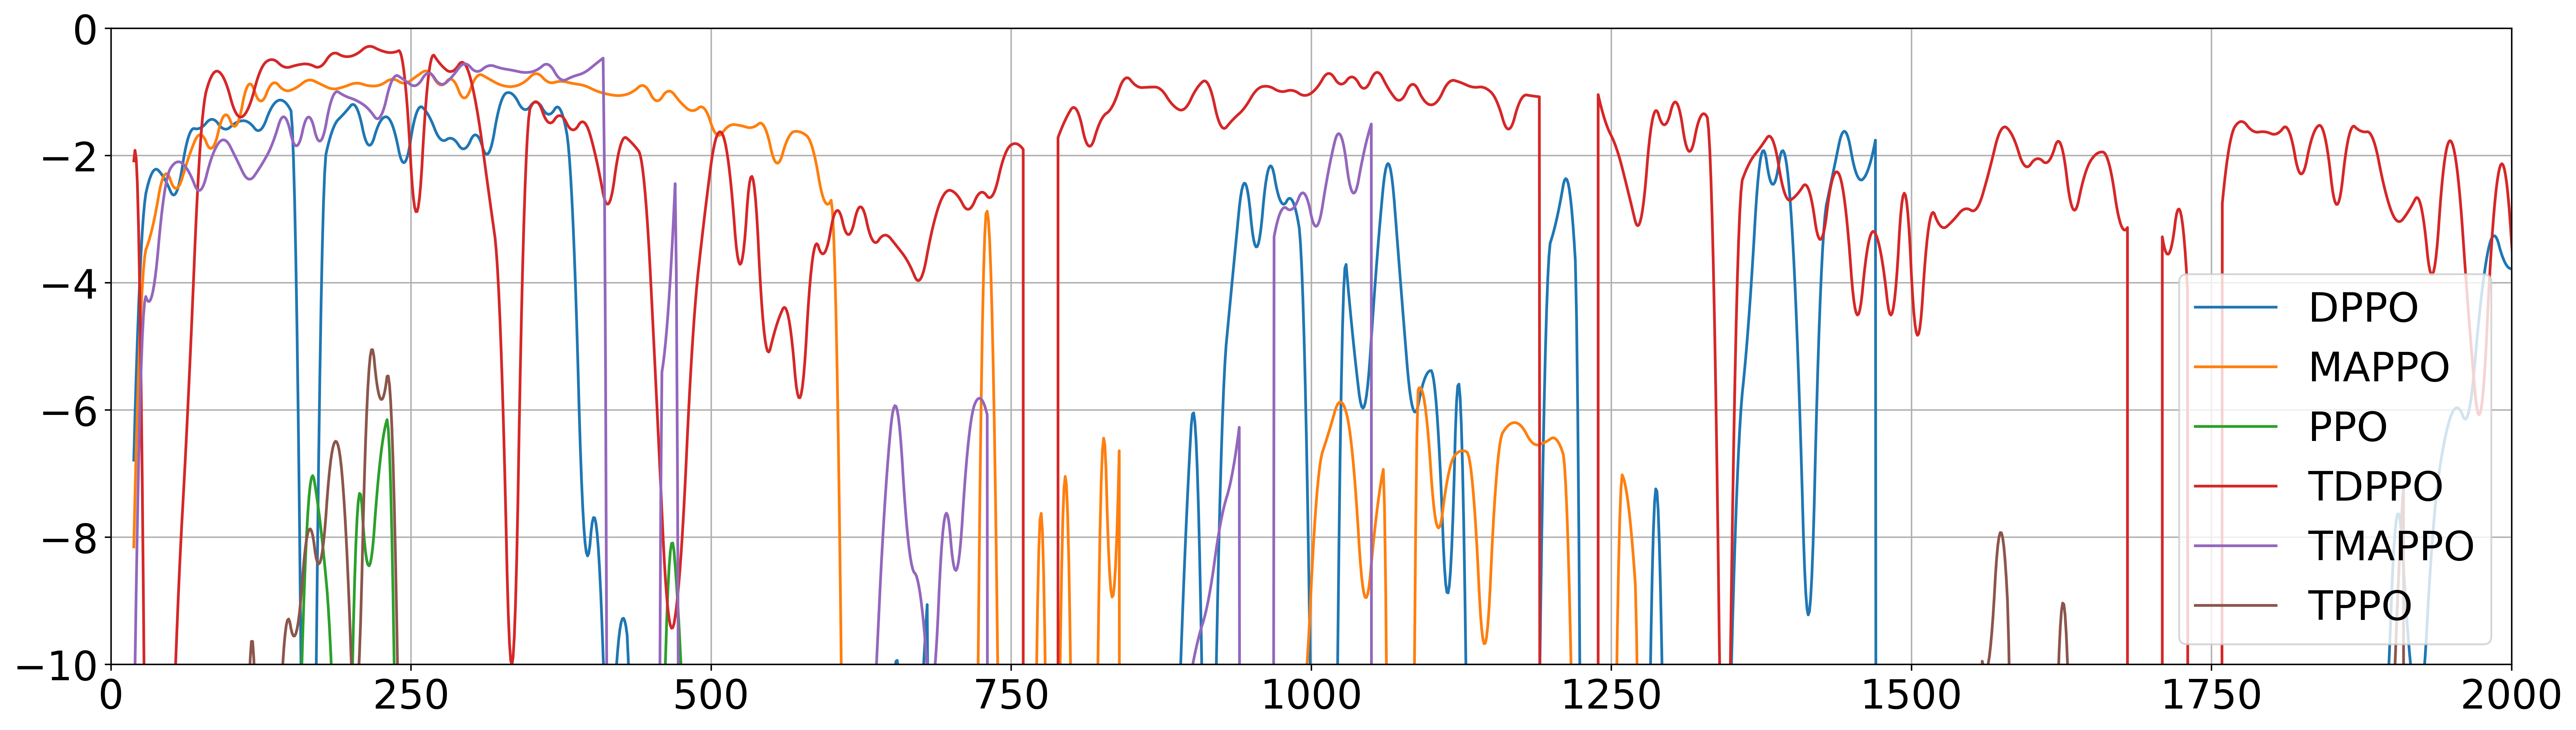

In [8]:
meanDF = pd.concat([expDF, evalRewardDF], axis=1, join='inner').groupby('name').mean().drop(['iteration', 'bestEvalEp'], axis=1)
stdDF = pd.concat([expDF, evalRewardDF], axis=1, join='inner').groupby('name').std().drop(['iteration', 'bestEvalEp'], axis=1)
fig = plt.figure(figsize=(20, 6))
plt.plot(meanDF.T.interpolate(method='linear').rolling(10).mean())
plt.xlim((0, 2e3))
plt.ylim((-1e1, 0))
plt.legend(['DPPO', 'MAPPO', 'PPO', 'TDPPO', 'TMAPPO', 'TPPO'])
plt.grid()
fig

## Training cost

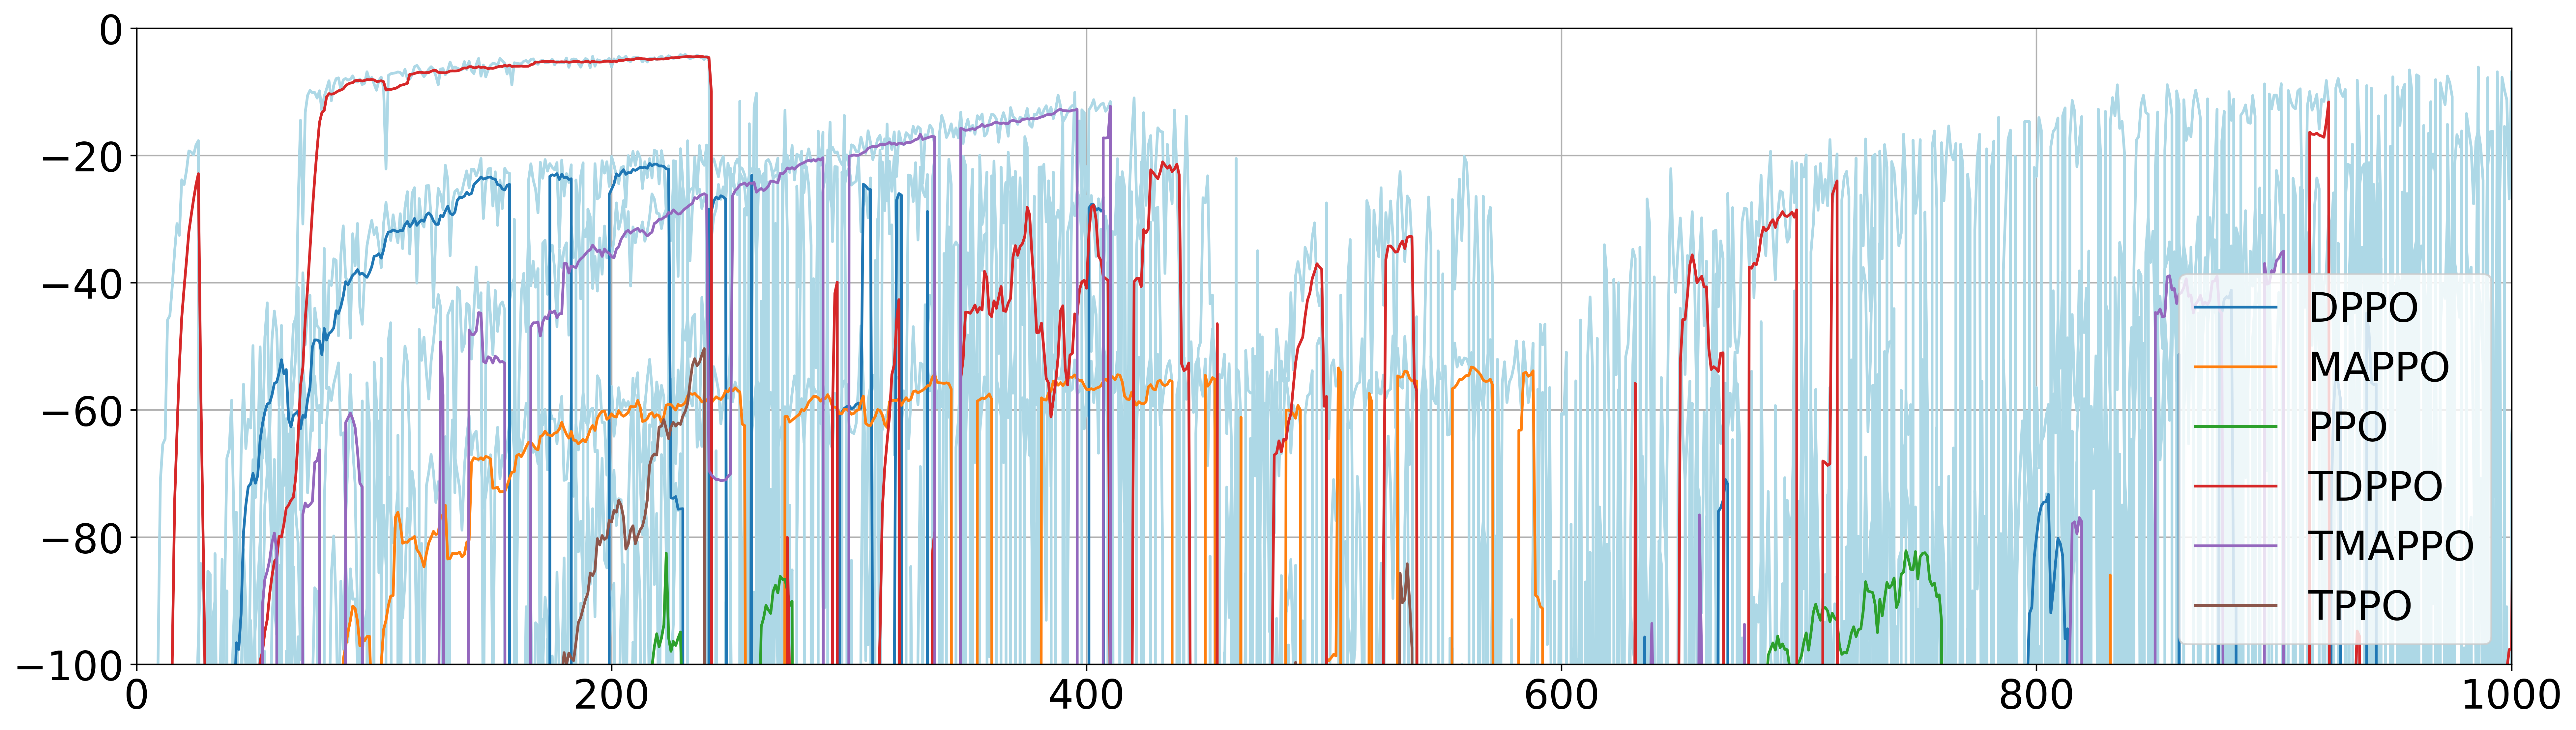

In [9]:
meanDF = pd.concat([expDF, rewardDF], axis=1, join='inner').groupby('name').mean().drop(['iteration', 'bestEvalEp'], axis=1)
stdDF = pd.concat([expDF, rewardDF], axis=1, join='inner').groupby('name').std().drop(['iteration', 'bestEvalEp'], axis=1)
fig = plt.figure(figsize=(20, 6))
plt.plot(meanDF.T, 'lightblue', label='_nolegend_')
plt.plot( meanDF.T.rolling(10).mean())
plt.xlim((0, 1e3))
plt.ylim((-1e2, 0))
plt.legend(['DPPO', 'MAPPO', 'PPO', 'TDPPO', 'TMAPPO', 'TPPO'])
plt.grid()
fig